In [1]:
import torch
import matplotlib.pyplot as plt
import os
import pandas as pd
import PlotModule

## load the model

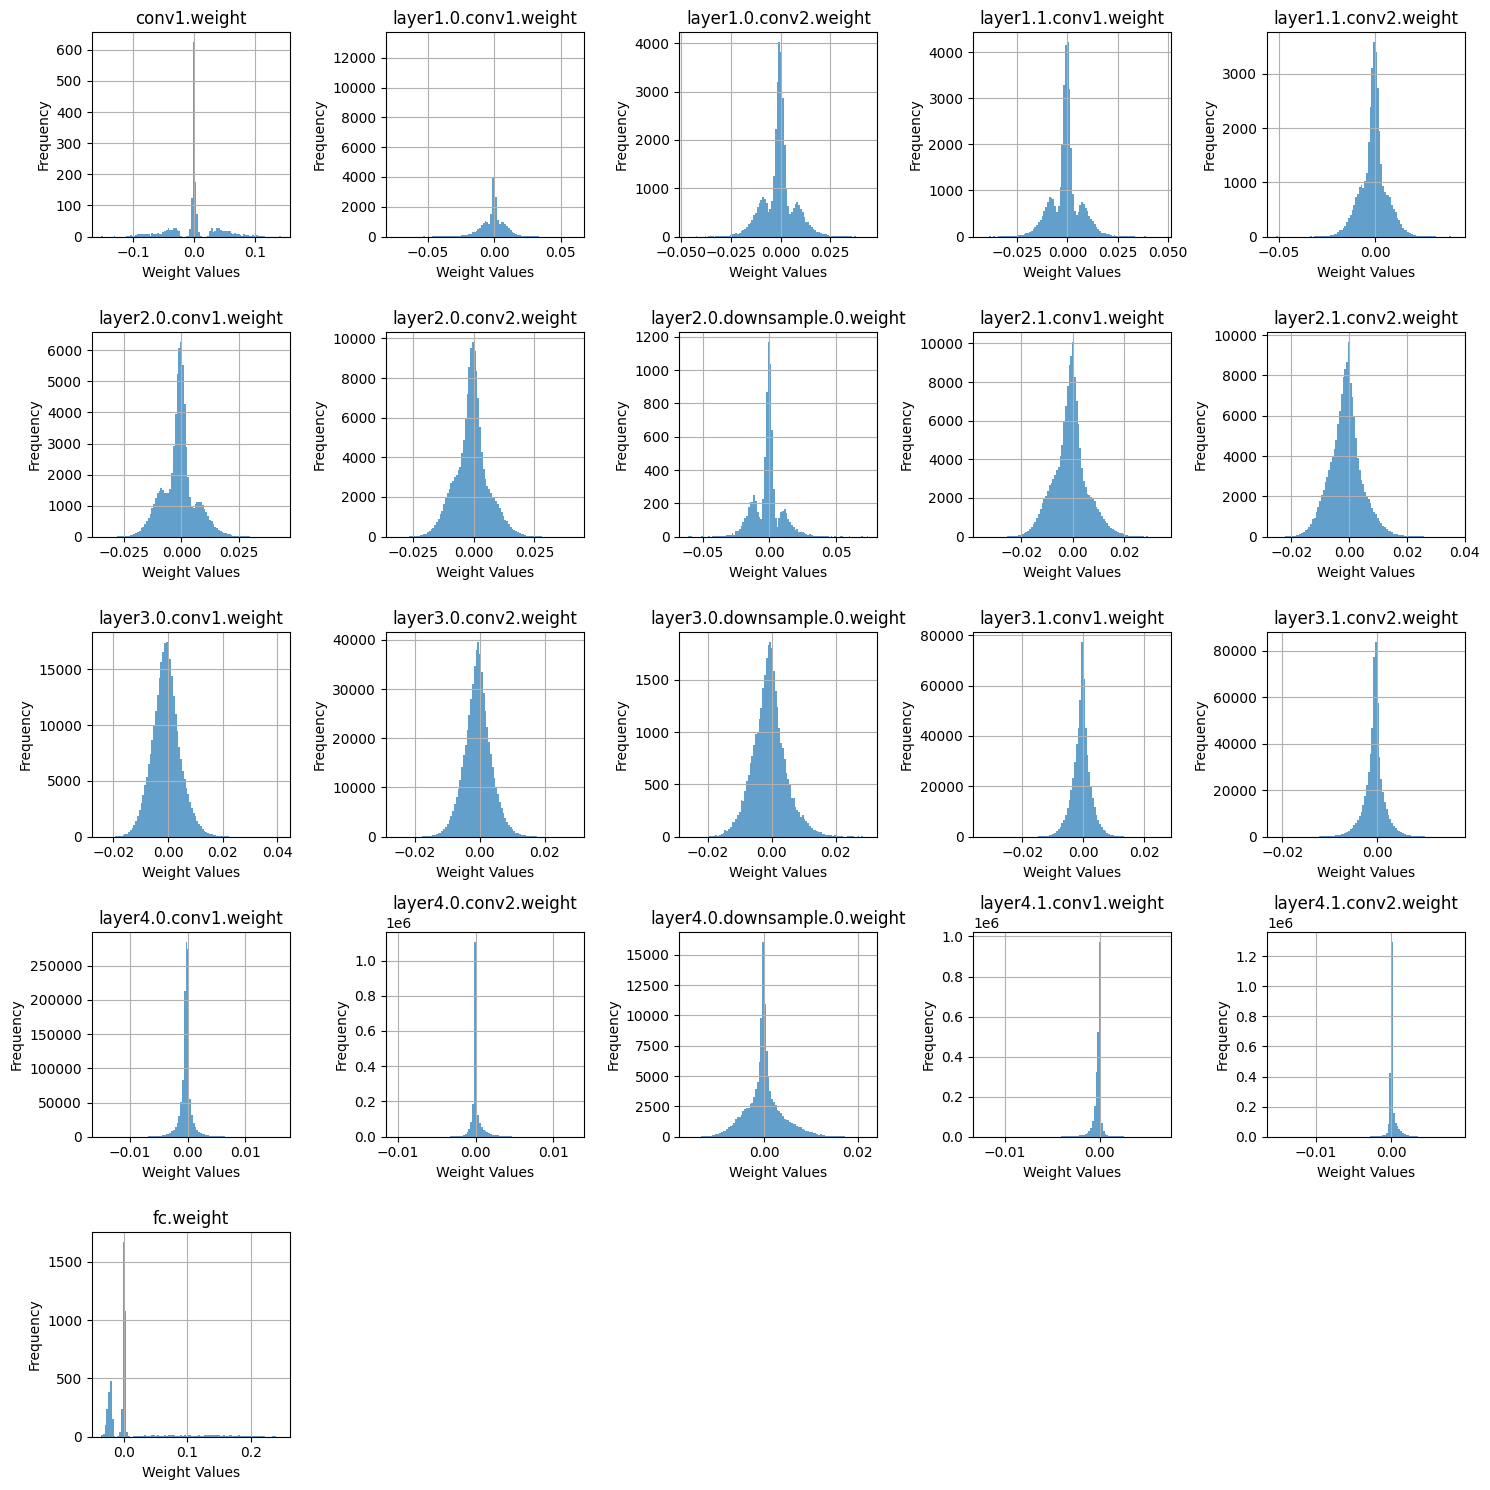

In [7]:
folder_name = 'Resnet18_p0.6'
model_name = '/FT_0.0001_50/best_model.pth'
dir_name = os.getcwd() + '/TestRun/'
folder_path = dir_name + folder_name
new_model = torch.load(f'{folder_path}/{model_name}', map_location="cpu")

PlotModule.plot_weight_dist_all(new_model)

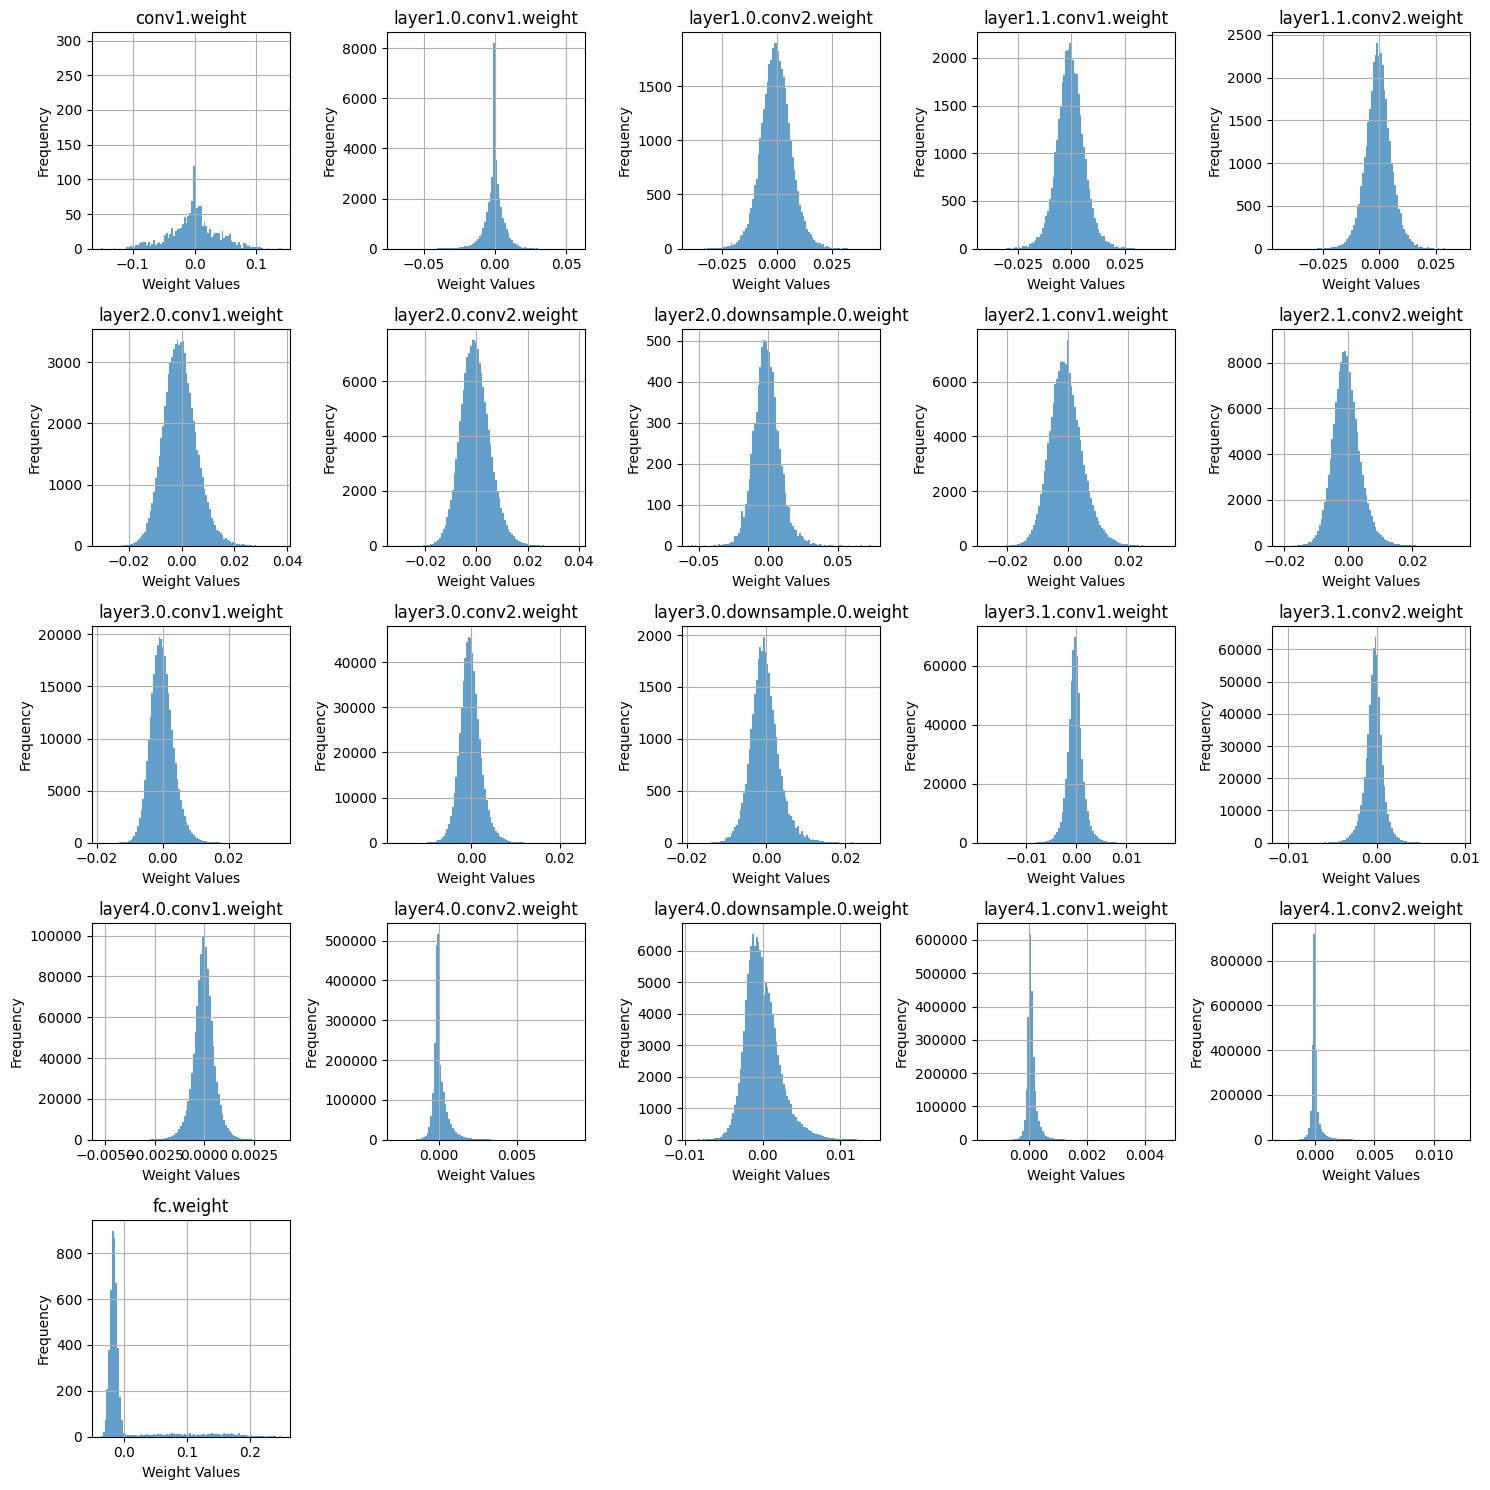

In [3]:
from Model.PyTorch_CIFAR10.cifar10_models.resnet import resnet18

orig_model = resnet18(pretrained=True)
PlotModule.plot_weight_dist_all(orig_model)

In [25]:
folder_name = 'Resnet18_p0.3'
model_name = '/FT_rev1.2_1e-06_30/best_model.pth'
dir_name = os.getcwd() + '/TestRun/'
folder_path = dir_name + folder_name
new_model = torch.load(f'{folder_path}/{model_name}', map_location="cpu")

Min Nonzero Gp (FC): 8.29728742246516e-05, Min Nonzero Gm (FC): 5.831732414662838e-05
Min Nonzero Gp (Conv): 1.6996034446492558e-07, Min Nonzero Gm (Conv): 1.5773581196754094e-07


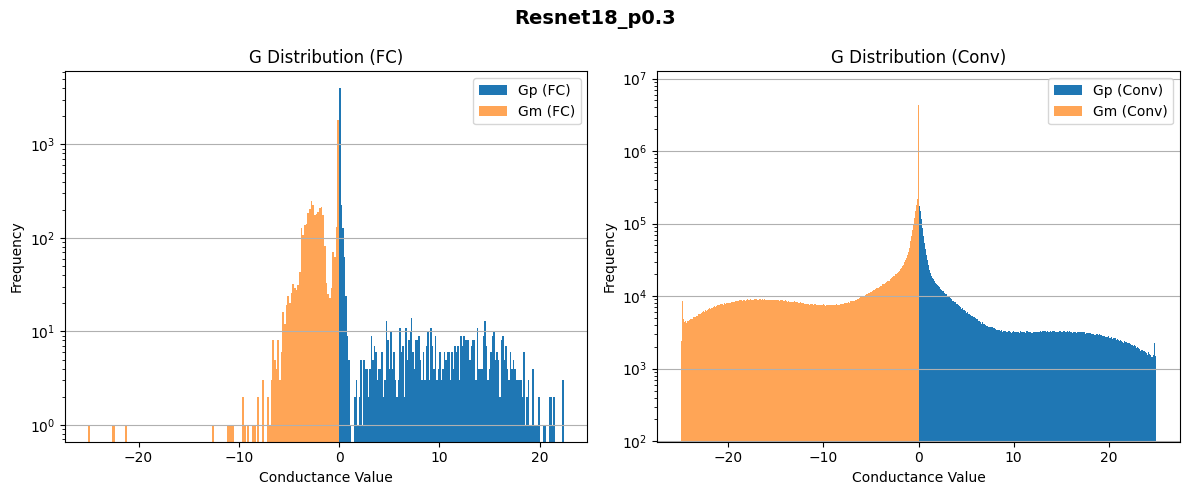

In [26]:
PlotModule.plot_conductance_distribution(new_model, folder_name, gdc=True, ideal_io=True)

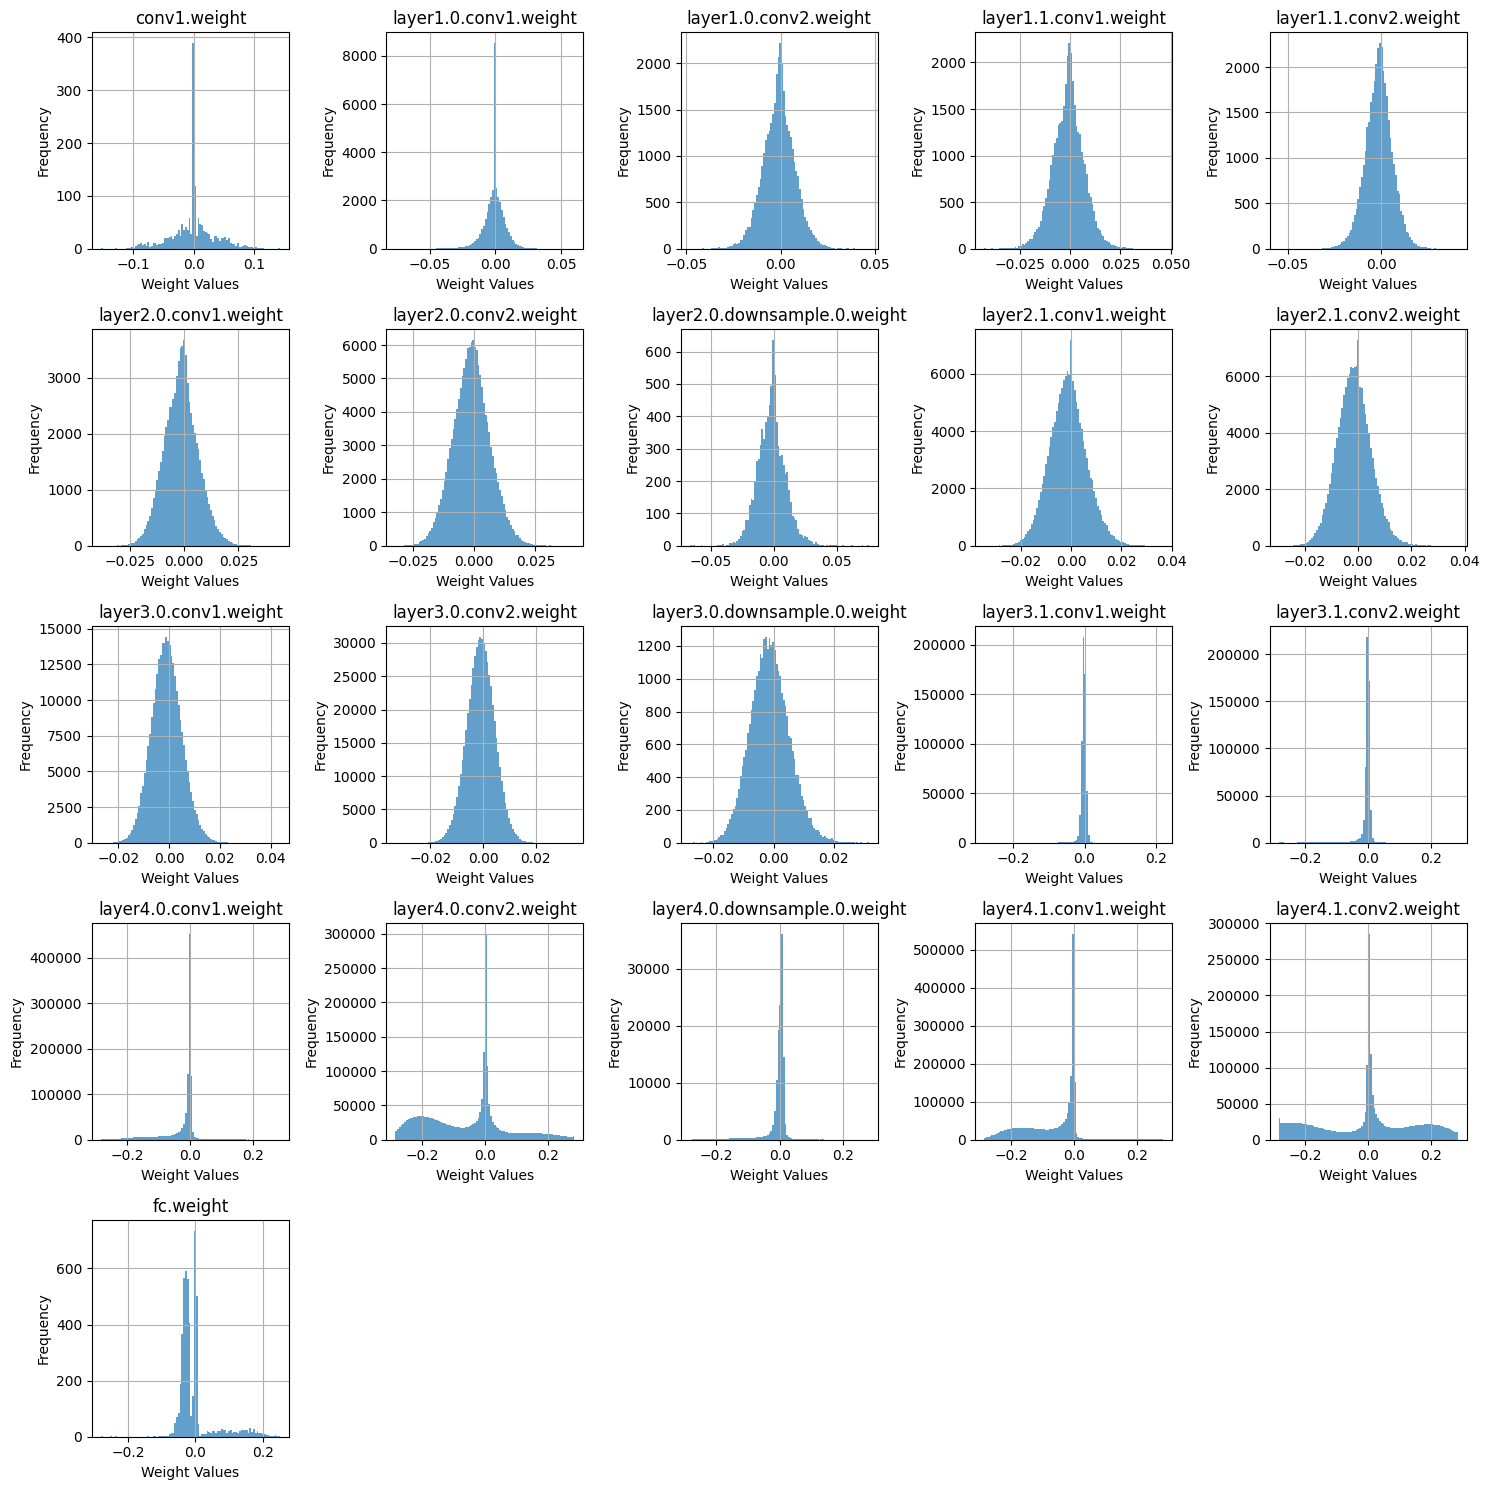

In [27]:
PlotModule.plot_weight_dist_all(new_model)